In [13]:
from keras.layers import Input, Dense
from keras.models import Model


# a layer instance is callable on a tensor, and returns a tensor
"""
- layer instance들은 모두 callable object, 
- tensor를 입력받아서 tensor를 리턴함.
- 특히, Sequential에서는 맨처음 레이어에서만 input_dims만 설정해주고, 
- 쭉 선형적으로 리스트처럼 나열해줬는데, 
- model에서는 매 레이어마다 어디서 input을 받는지, argument의 형태로 모두 정의해주어야 함.
"""
# This returns a tensor
inputs = Input(shape=(784,))
D1 = Dense(64, activation='relu')(inputs) 
D2 = Dense(64, activation='relu')(D1)
predictions = Dense(10, activation='softmax')(D2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(data, labels)  # starts training
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
x = Input(shape=(784,))

y = model(x)
y.summary()

AttributeError: 'Tensor' object has no attribute 'summary'

In [6]:
from keras.models import Model, Sequential 

"""
- Sequential 로는 다음처럼 표현할 수 있다. 
- 맨 처음에, InputLayer만 없는것을 제외하면 나머지는 동일함. 
"""
seq_model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)), 
    Dense(64, activation='relu'), 
    Dense(10, activation='softmax'),
])

seq_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit(data, labels)  # starts training
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [66]:
#### data reading
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_train, y_train = mnist.train.images, mnist.train.labels
x_test, y_test = mnist.test.images, mnist.test.labels

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam, SGD
from keras import metrics

## sequential model 
seq_model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'), 
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

print("#### Sequential Model")
seq_model.summary()
seq_model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              metrics=[metrics.categorical_accuracy])
train_history = seq_model.fit(x_train, y_train, epochs=5, batch_size=500, verbose=2)
train_history = train_history.history # epoch마다 변화한 loss, metric

loss_and_metric = seq_model.evaluate(x_train, y_train, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))
loss_and_metric = seq_model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print("test, loss and metric: {}".format(loss_and_metric))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
#### Sequential Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_79 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_80 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_81 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
5s - loss: 0.4286 - categorical_accuracy: 

In [65]:
input2 = Input(shape=(784,))
nD1 = seq_model.layers[0](input2)
nD2 = seq_model.layers[1](nD1)
nD3 = seq_model.layers[2](nD2)
nD4 = seq_model.layers[3](nD3) #nD4 = model.layers[4](nD3)
model1 = Model(input2, nD4)
model1.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              metrics=[metrics.categorical_accuracy])
model1.summary()

loss_and_metric = model1.evaluate(x_train, y_train, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))
loss_and_metric = model1.evaluate(x_test, y_test, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_75 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_76 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_77 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
train, loss and metric: [0.041054270681467921, 0.98849090910824866]
train, loss and metric: [0.078584650909528139, 0.97660000000000002]


In [67]:
loss_and_metric = model1.evaluate(x_train, y_train, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))
loss_and_metric = model1.evaluate(x_test, y_test, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))

train, loss and metric: [0.041054270681467921, 0.98849090910824866]
train, loss and metric: [0.078584650909528139, 0.97660000000000002]


In [60]:
from keras.layers import TimeDistributed

# Input tensor for sequences of 20 timesteps,
# each containing a 784-dimensional vector
input_sequences = Input(shape=(20, 784))
# This applies our previous model to every timestep in the input sequences.
# the output of the previous model was a 10-way softmax,
# so the output of the layer below will be a sequence of 20 vectors of size 10.
processed_sequences = TimeDistributed(seq_model)(input_sequences)

In [44]:
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_51 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_52 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [70]:
import keras 
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(5,), name='aux_input')
#######################
#### concatenate inputs
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])
"""
model.fit({'main_input': headline_data, 'aux_input': additional_data}, 
          {'main_output': labels, 'aux_output': labels}, 
          epochs=50, batch_size=32)
"""
model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 100)           0                                            
____________________________________________________________________________________________________
embedding_3 (Embedding)          (None, 100, 512)      5120000     main_input[0][0]                 
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 32)            69760       embedding_3[0][0]                
____________________________________________________________________________________________________
aux_input (InputLayer)           (None, 5)             0                                            
___________________________________________________________________________________________

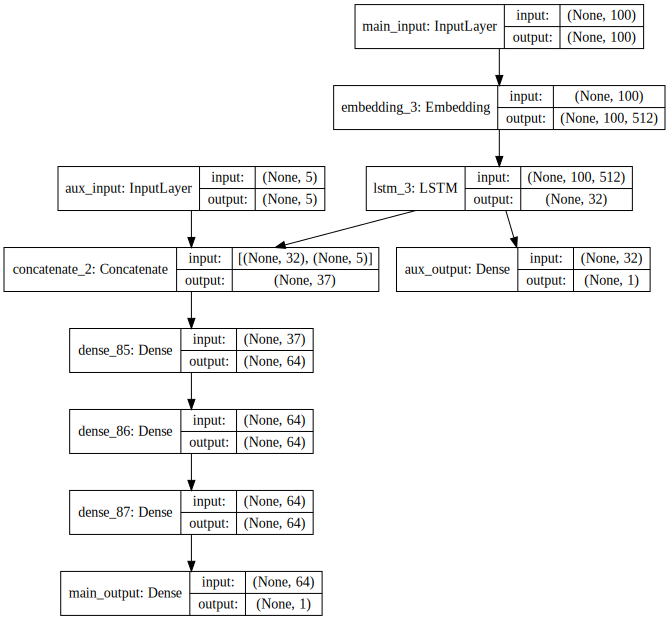

In [75]:
from IPython.display import SVG #jupyter notebook에서 보려고 
from keras.utils.vis_utils import model_to_dot # keras model을 dot language로 변환
from keras.utils import plot_model


plot_model(model1, to_file='../../assets/images/markdown_img/180624_nn_multi_in_output.svg')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))